# Focus:

    The focus of this anaylsis is to provide insights on canceled and not canceled bookings using the given dataset, hotel_bookings which can be found on kaggle. 

Link to dataset: https://www.kaggle.com/jessemostipak/hotel-booking-demand

# Importing Packages

In [1]:
#below are common packages/libraries I use
import pandas as pd
import numpy as np
import scipy as scipy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None) #display all columns when using pandas dataframe

df = pd.read_csv('hotel_bookings.csv')

df.shape

(119390, 32)

# Creating Numpy arrays of numerical variables 

In [2]:
#create numpy arrays of numerical columns 
lead_time = np.array(df['lead_time'])
is_canceled = np.array(df['is_canceled'])
stays_in_weekend_nights = np.array(df['stays_in_weekend_nights'])
stays_in_week_nights = np.array(df['stays_in_week_nights'])
adults = np.array(df['adults'])
children = np.array(df['children'])
adults = np.array(df['adults'])
babies = np.array(df['babies'])
is_repeated_guest = np.array(df['is_repeated_guest'])
previous_cancellations = np.array(df['previous_cancellations'])
previous_bookings_not_canceled =np.array(df['previous_bookings_not_canceled'])
booking_changes = np.array(df['booking_changes'])
days_in_waiting_list = np.array(df['days_in_waiting_list'])
adr = np.array(df['adr'])
required_car_parking_spaces = np.array(df['required_car_parking_spaces'])
total_of_special_requests  = np.array(df['total_of_special_requests'])

# Removing missing values

In [3]:
# Removing Missing values

df.isnull().sum() #checking to see which variables having missing and sum (children(4), country (488), agent(16340) and company(112593) having missing)
df['children']=df.children.fillna(0) #fill missing rows for children with 0 
df = df.drop(['agent','company'], axis=1) #drop agent(ID column) and company column as it contains too many missing values
df = df.dropna(axis=0, subset=['country']) #since country only has 488/119390 missing values we are dropping rows with missing values
df.isnull().sum() #dataset now contains no missing values


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Creating a pandas datetime column

We will only explore the most recent data (2017) in our dataset. Below I created a datetime column that ppython can read and then filtered only observations in 2017

In [4]:
#combining date columns into a single pandas date time format

df['date'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str) + df.arrival_date_day_of_month.astype(str), format='%Y%B%d')
df['date'].dtype
df #data frame now contains a pandas date time format date column

df = df.loc[(df['date'] >= '2017-01-01')& (df['date'] <= '2017-12-31')]
df



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
9775,Resort Hotel,1,74,2017,January,1,1,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,57.60,0,0,Canceled,10/20/16,2017-01-01
9776,Resort Hotel,1,62,2017,January,1,1,2,2,2,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,51.50,0,1,Canceled,12/4/16,2017-01-01
9777,Resort Hotel,1,62,2017,January,1,1,2,2,2,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,51.50,0,1,Canceled,11/11/16,2017-01-01
9778,Resort Hotel,1,62,2017,January,1,1,2,2,2,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,51.50,0,1,Canceled,12/4/16,2017-01-01
9779,Resort Hotel,1,71,2017,January,1,1,2,2,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,32.22,0,1,Canceled,10/29/16,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/17,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/17,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/17,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/17,2017-08-31


# Descriptive Statistics

Lead Time:

-On average, consumers booked in advance 109 days ahead of their booking arrival (S.D. = 108 days). Half of the bookings in 2017, booked 81 days in advance to the bookings arrival date. 25% of the bookings in 2017 were booked 23 days in advance to the bookings arrival date.

Average Daily Rate:

-On average, the mean daily rate for a booking was 114.7 dollars (S.D.=50.5 dollars). Half of the bookings had a average daily rate of 107.1 dollars and 25 percent had a average daily rate of 80 dollars

In [5]:
#excluding objects quickly describe the dataset 

df.describe(include='all', datetime_is_numeric=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
count,40604,40604.000000,40604.000000,40604.0,40604,40604.000000,40604.000000,40604.000000,40604.000000,40604.000000,40604.000000,40604.000000,40604,40604,40604,40604,40604.000000,40604.000000,40604.000000,40604,40604,40604.000000,40604,40604.000000,40604,40604.000000,40604.000000,40604.000000,40604,40604,40604
unique,2,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,149,7,4,NaN,NaN,NaN,9,11,NaN,3,NaN,4,NaN,NaN,NaN,3,484,NaN
top,City Hotel,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,11/25/16,NaN
freq,27504,NaN,NaN,NaN,6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30450,12962,22636,33588,NaN,NaN,NaN,27489,24889,NaN,36451,NaN,33717,NaN,NaN,NaN,24870,665,NaN
mean,NaN,0.387499,109.454413,2017.0,NaN,18.650281,15.718008,0.974411,2.604054,1.879199,0.126490,0.006477,NaN,NaN,NaN,NaN,0.034258,0.011772,0.167003,NaN,NaN,0.239632,NaN,0.235666,NaN,114.777777,0.054748,0.676830,NaN,NaN,2017-05-07 15:26:19.942863360
min,NaN,0.000000,0.000000,2017.0,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,2017-01-01 00:00:00
25%,NaN,0.000000,23.000000,2017.0,NaN,11.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,80.000000,0.000000,0.000000,NaN,NaN,2017-03-15 00:00:00
50%,NaN,0.000000,81.000000,2017.0,NaN,19.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,107.100000,0.000000,0.000000,NaN,NaN,2017-05-09 00:00:00
75%,NaN,1.000000,165.000000,2017.0,NaN,26.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,140.000000,0.000000,1.000000,NaN,NaN,2017-07-01 00:00:00
max,NaN,1.000000,629.000000,2017.0,NaN,35.000000,31.000000,16.000000,40.000000,4.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,6.000000,72.000000,NaN,NaN,18.000000,NaN,223.000000,NaN,510.000000,8.000000,5.000000,NaN,NaN,2017-08-31 00:00:00


# Correlation Heatmap

The heatmap below shows there are no strong positive or negative correlations amongst numerical variables in 2017

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'lead_time'),
  Text(1.5, 0, 'stays_in_weekend_nights'),
  Text(2.5, 0, 'stays_in_week_nights'),
  Text(3.5, 0, 'adults'),
  Text(4.5, 0, 'children'),
  Text(5.5, 0, 'babies'),
  Text(6.5, 0, 'previous_cancellations'),
  Text(7.5, 0, 'previous_bookings_not_canceled'),
  Text(8.5, 0, 'booking_changes'),
  Text(9.5, 0, 'days_in_waiting_list'),
  Text(10.5, 0, 'adr'),
  Text(11.5, 0, 'required_car_parking_spaces'),
  Text(12.5, 0, 'total_of_special_requests')])

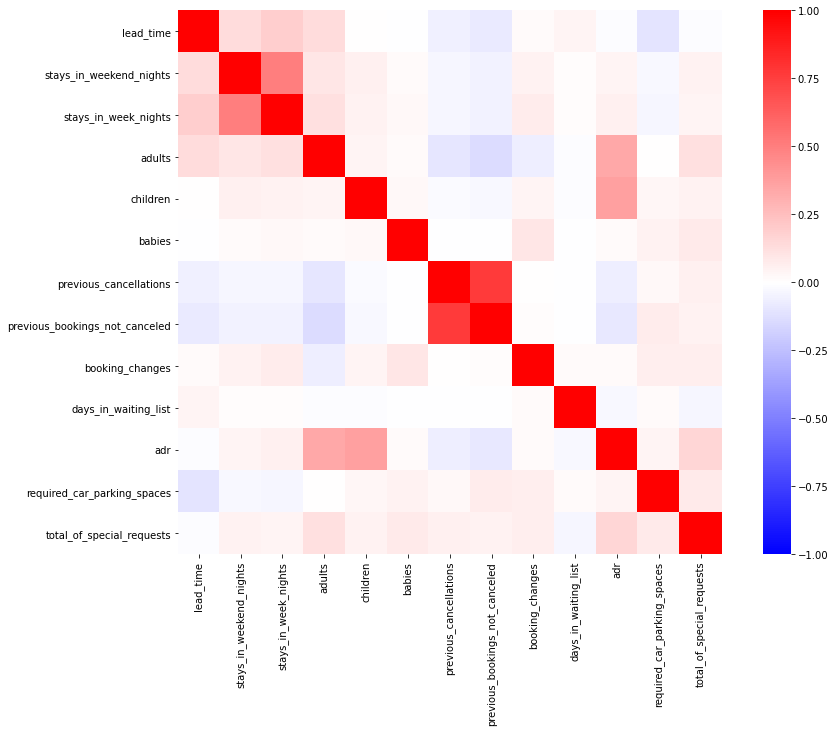

In [6]:
#Now let's look at a heatmap matrix for correlations amongst variables
cols_corr = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 
                'children', 'babies', 'previous_cancellations','previous_bookings_not_canceled',
               'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]



plt.figure(figsize=(15, 10))
correlations = cols_corr.corr()
sns.heatmap(data = correlations, square = True, cmap='bwr', vmin=-1)

plt.yticks(rotation=0)
plt.xticks(rotation=90)


# Correlation Matrix


To confirm our quick glance at the heatmap above amongst numerical variables let's take one more look at a correlation matrix to make sure there are no positive or negative strong correlations.

In [7]:
correlations_table = cols_corr.corr()
correlations_table

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.138564,0.189551,0.139655,0.006820,-0.004302,-0.054699,-0.083386,0.019462,0.044449,-0.014330,-0.101640,-0.013192
stays_in_weekend_nights,0.138564,1.000000,0.502058,0.095681,0.057810,0.019816,-0.038176,-0.053611,0.048710,0.008592,0.046741,-0.025371,0.048979
stays_in_week_nights,0.189551,0.502058,1.000000,0.118423,0.052241,0.023983,-0.035666,-0.051066,0.076210,0.012659,0.059592,-0.032839,0.042299
adults,0.139655,0.095681,0.118423,1.000000,0.039238,0.018717,-0.096678,-0.138937,-0.065712,-0.008489,0.342427,0.003493,0.123265
children,0.006820,0.057810,0.052241,0.039238,1.000000,0.025359,-0.018518,-0.024773,0.044342,-0.015303,0.367300,0.038538,0.050311
babies,-0.004302,0.019816,0.023983,0.018717,0.025359,1.000000,-0.003428,-0.006508,0.098262,-0.002294,0.020952,0.049393,0.083633
previous_cancellations,-0.054699,-0.038176,-0.035666,-0.096678,-0.018518,-0.003428,1.000000,0.768935,0.004195,-0.003134,-0.065020,0.029423,0.057232
previous_bookings_not_canceled,-0.083386,-0.053611,-0.051066,-0.138937,-0.024773,-0.006508,0.768935,1.000000,0.008783,-0.003068,-0.088479,0.070404,0.054457
booking_changes,0.019462,0.048710,0.076210,-0.065712,0.044342,0.098262,0.004195,0.008783,1.000000,0.020685,0.021067,0.069957,0.065077
days_in_waiting_list,0.044449,0.008592,0.012659,-0.008489,-0.015303,-0.002294,-0.003134,-0.003068,0.020685,1.000000,-0.029235,0.020695,-0.033212


# Point Biserial Correlation with Is_Canceled Column (fix format)

Point Biserial Correlation: Outputs a correlation coefficient and p-value of one continous variable and one binary variable.

Since our focus is on cancellations, let's explore correlations using a Point Biserial Correlation. Below we see that there is no correlation that exists between lead time,is_repeated_guest, previous_cancellations, ADR for canceled and not canceled bookings. 

In [40]:
print('\nlead_time:')
print(scipy.stats.pointbiserialr(is_canceled, lead_time))
print('\nis_repeated_guest:')
print(scipy.stats.pointbiserialr(is_canceled, is_repeated_guest))
print('\nprevious_cancellations')
print(scipy.stats.pointbiserialr(is_canceled,previous_cancellations))
print('\nadr:')
print(scipy.stats.pointbiserialr(is_canceled, adr))
print('\nbooking_changes:')
print(scipy.stats.pointbiserialr(is_canceled, booking_changes))



lead_time:
PointbiserialrResult(correlation=0.2931233557607158, pvalue=0.0)

is_repeated_guest:
PointbiserialrResult(correlation=-0.0847934183570871, pvalue=2.3127064757788545e-189)

previous_cancellations
PointbiserialrResult(correlation=0.11013280822284356, pvalue=8.9327e-319)

adr:
PointbiserialrResult(correlation=0.04755659788038595, pvalue=9.68293417989299e-61)

booking_changes:
PointbiserialrResult(correlation=-0.14438099106132388, pvalue=0.0)


# % of Bookings Canceled and Not Canceled with Bar Plot

There was a significantly high number of canceled bookings in the year 2017. 38.75% of bookings were canceled and 61.25% of the bookings were not canceled.

0    24870
1    15734
Name: is_canceled, dtype: int64
Percent Not Cancelled: 61.25012314057729
Percent Cancelled: 38.74987685942271


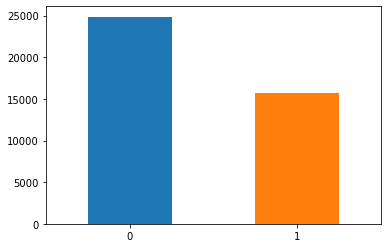

In [9]:
colors = ['#1f77b4', '#ff7f0e']
df.is_canceled.value_counts().plot(kind='bar', color=colors)  


print(df.is_canceled.value_counts())

sum_1_0 = df[df.is_canceled==0].is_canceled.count() + df[df.is_canceled==1].is_canceled.count()

zero =df[df.is_canceled==0].is_canceled.count()/sum_1_0*100
one = df[df.is_canceled==1].is_canceled.count()/sum_1_0*100

plt.xticks(rotation=0)
print('Percent Not Cancelled:', zero)
print('Percent Cancelled:', one)


# Canceled and Not Canceled Bookings Average Daily Rate

The average daily rate for 2017 was lower for canceled bookings and hgiher for bookings that were not canceled.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

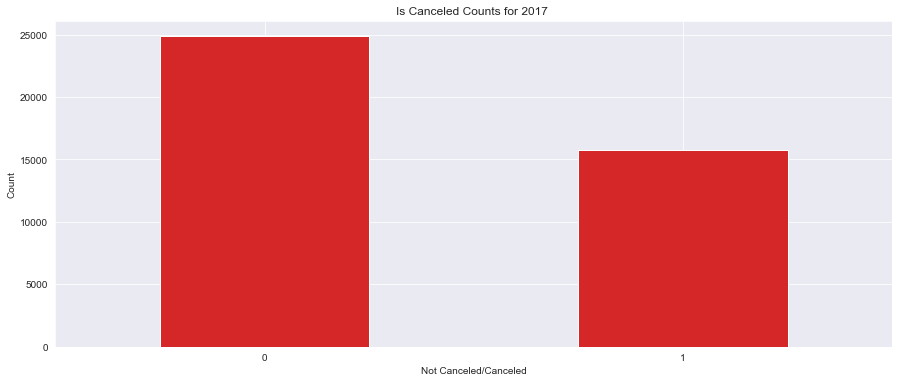

In [10]:

colors = ['#d62728', '#d62728']
sns.set_style('darkgrid')
#df['year'] = df['date'].dt.year
df.is_canceled.value_counts().plot(kind = 'bar',figsize=(15,6), color=colors)
 

# Aesthetics
plt.title("Is Canceled Counts for 2017 ")
plt.xlabel("Not Canceled/Canceled")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Canceled/Not Canceled Bookings Median Lead time

50% of the bookings in 2017 that were canceled, were booked 116 days prior to their arrival date. Canceled bookings had a very high lead time compared to bookings that were not canceled. A Mann-Whitney U Test in another notebook will further explore this data. 

Insight drawn: The farther out a booking is made relative to the bookings arrival date the more likely it is that booking may be canceled, and the closer a booking is made relative to the bookings arrival date, the less likelihood that booking will be canceled. Further statistical tests are needed to confirm this insight, see MannWhitneyU_test_HotelBookingAnalysis notebook for further analysis.

Canceled Bookings Median Lead Time: 116.0
Non Canceled Bookings Median Lead Time: 57.0


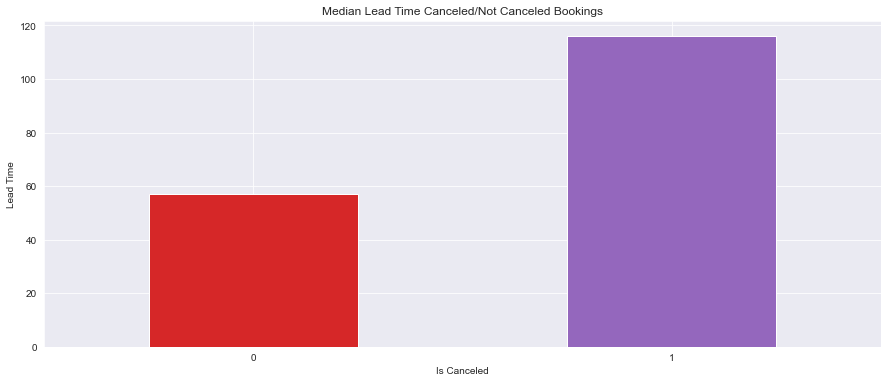

In [11]:
#median lead time cancellation chart 0,1 for all years 
colors = ['#d62728','#9467bd']
sns.set_style('darkgrid')
ax = df.groupby('is_canceled').lead_time.median()
ax.plot(kind='bar', figsize=(15,6), color=colors)


# Aesthetics
plt.title("Median Lead Time Canceled/Not Canceled Bookings")
plt.xlabel("Is Canceled")
plt.ylabel("Lead Time")
plt.xticks(rotation=0)
print('Canceled Bookings Median Lead Time:', df[df.is_canceled==1].lead_time.median())
print('Non Canceled Bookings Median Lead Time:', df[df.is_canceled==0].lead_time.median())


# Average Lead Time of Canceled/Not Canceled Bookings

On average the number of bookings that were canceled were booked 139 days in advance to their arrival date. Non canceled bookings were booked on average, 90 days in advance to its arrival date.

Canceled Bookings Mean Lead Time: 139.11827888648787
Non Canceled Bookings Mean Lead Time: 90.6875753920386


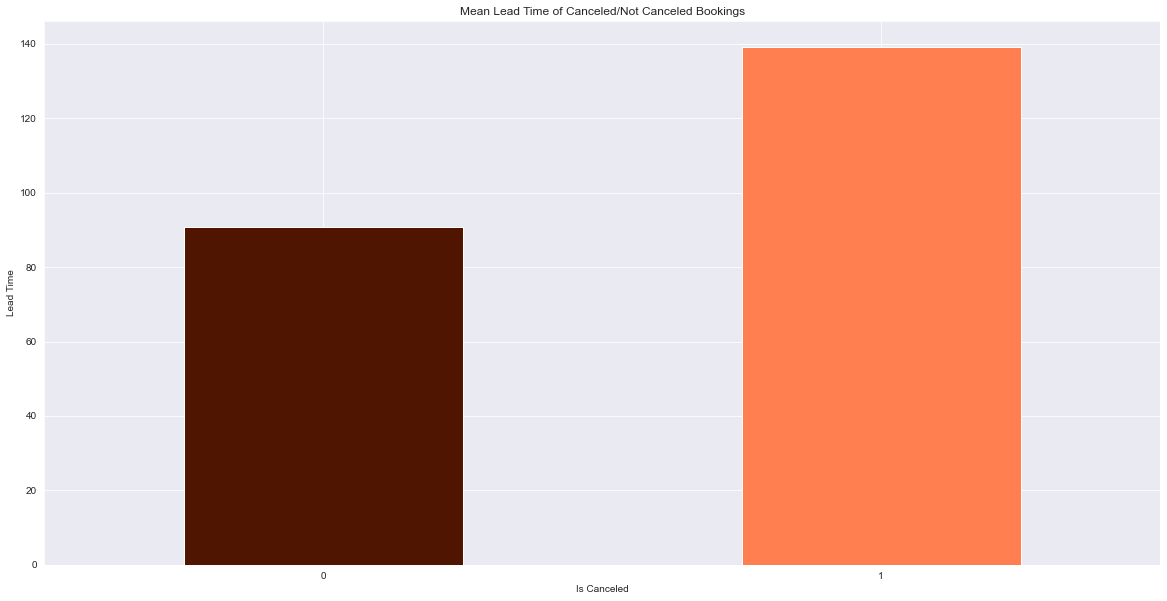

In [12]:
colors = ['#501500','#ff7f50']
sns.set_style('darkgrid')
ax = df.groupby('is_canceled').lead_time.mean()
fig = ax.plot(kind='bar', figsize=(20,10), color=colors)
fig

# Aesthetics
plt.title("Mean Lead Time of Canceled/Not Canceled Bookings")
plt.xlabel("Is Canceled")
plt.ylabel("Lead Time")
plt.xticks(rotation=0, horizontalalignment="center")
print('Canceled Bookings Mean Lead Time:', df[df.is_canceled==1].lead_time.mean())
print('Non Canceled Bookings Mean Lead Time:', df[df.is_canceled==0].lead_time.mean())

# Mean ADR of Canceled/Not Canceled Bookings

The difference in cost of average daily rate was $8.47. Further tests need to be conducted to determine if this is statistically significant. Canceled bookings had a higher average daily rate than non canceled bookings. Check Ztest_compare_means_HotelBookingAnalysis.ipynb notebook for further analysis. 



Average ADR for Not Canceled Bookings 111.49480498592872
Average ADR for Canceled Bookings 119.96701792297321


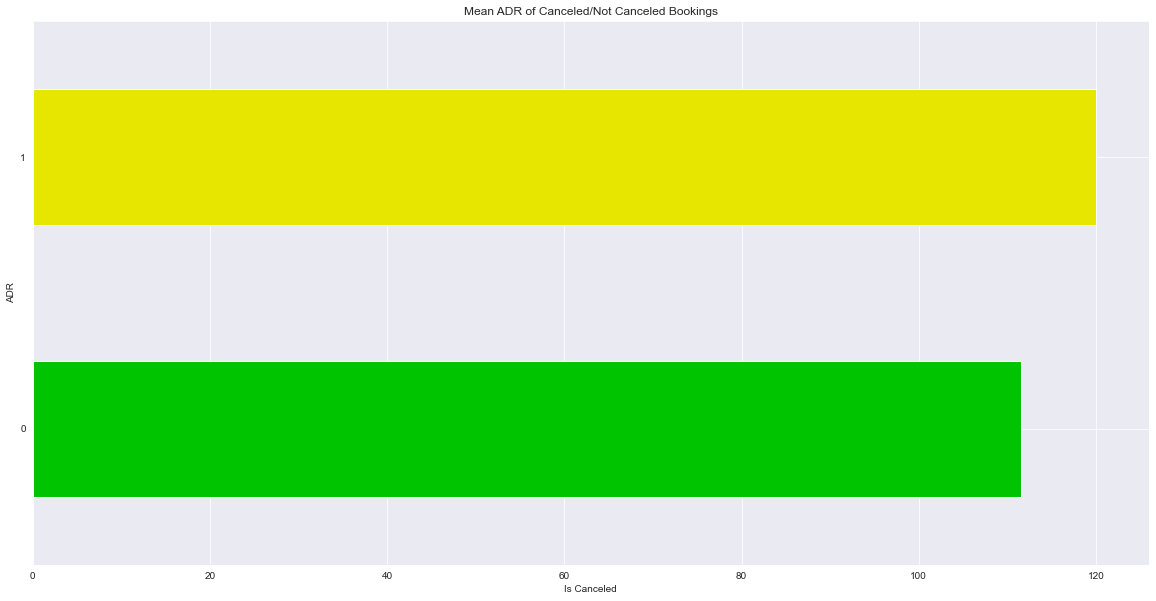

In [13]:
colors = ['#00c400','#e6e600']
sns.set_style('darkgrid')
ax = df.groupby('is_canceled').adr.mean()
fig = ax.plot(kind='barh', figsize=(20,10), color=colors)
fig

# Aesthetics

plt.title("Mean ADR of Canceled/Not Canceled Bookings")
plt.xlabel("Is Canceled")
plt.ylabel("ADR")
plt.xticks(rotation=0, horizontalalignment="center")

print('Average ADR for Not Canceled Bookings',df[df.is_canceled==0].adr.mean())
print('Average ADR for Canceled Bookings',df[df.is_canceled==1].adr.mean())


# Canceled/Not Canceled Bookings Median Average Daily Rate

The median average daily rate for canceled bookings was higher (110.0) than non canceled bookings (104.0)

Median ADR for Not Canceled Bookings 104.0
Median ADR for Canceled Bookings 110.0


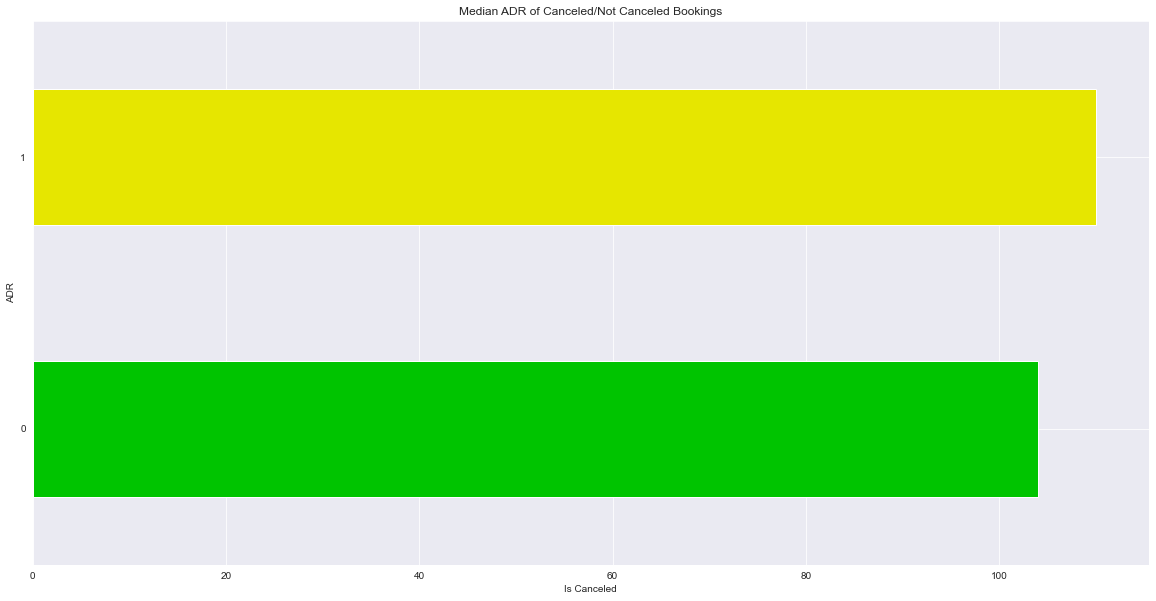

In [14]:
colors = ['#00c400','#e6e600']
sns.set_style('darkgrid')
ax = df.groupby('is_canceled').adr.median()
fig = ax.plot(kind='barh', figsize=(20,10), color=colors)
fig

# Aesthetics

plt.title("Median ADR of Canceled/Not Canceled Bookings")
plt.xlabel("Is Canceled")
plt.ylabel("ADR")
plt.xticks(rotation=0, horizontalalignment="center")

print('Median ADR for Not Canceled Bookings',df[df.is_canceled==0].adr.median())
print('Median ADR for Canceled Bookings',df[df.is_canceled==1].adr.median())

# Canceled/Not Canceled Bookings Count Over Time

Canceled bookings and non canceled bookings were at the lowest in the beginning of the year, and peaked in May. We can see that cancellations were increasing from March to April 2017, however the number of non canceled bookings were decreasing. 

From June to July 2017, we can see the opposite, where the number of bookings cancled decreased while the number of non canceled bookings increased. 

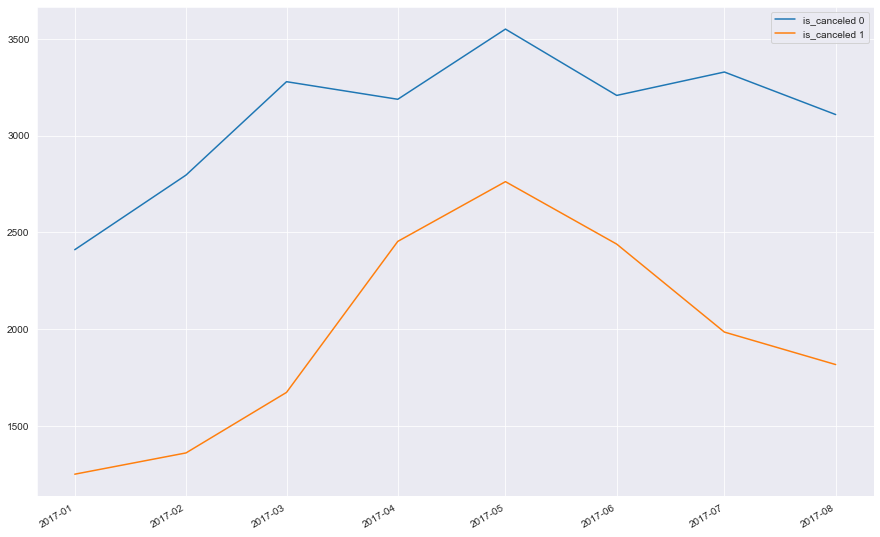

In [15]:
from matplotlib import rcParams
rcParams['figure.figsize']= 20,6

df['year_month'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str), format='%Y%B')
year_month = df['year_month']
df[df.is_canceled == 0].year_month.value_counts().plot(kind='line', figsize=(15,10),  label = 'is_canceled 0')
df[df.is_canceled == 1].year_month.value_counts().plot(kind='line', figsize=(15,10),  label = 'is_canceled 1')
plt.legend()
plt.show()

# Not Canceled Count of Stays In Week Nights

For weekday nights, 1, 2 and 3 weekday stays had the highest number of non cancellations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '4'),
  Text(5, 0, '0'),
  Text(6, 0, '6'),
  Text(7, 0, '10'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '9'),
  Text(11, 0, '15'),
  Text(12, 0, '19'),
  Text(13, 0, '12'),
  Text(14, 0, '11'),
  Text(15, 0, '20'),
  Text(16, 0, '13'),
  Text(17, 0, '16'),
  Text(18, 0, '30'),
  Text(19, 0, '25'),
  Text(20, 0, '21'),
  Text(21, 0, '14'),
  Text(22, 0, '40'),
  Text(23, 0, '26'),
  Text(24, 0, '17'),
  Text(25, 0, '32')])

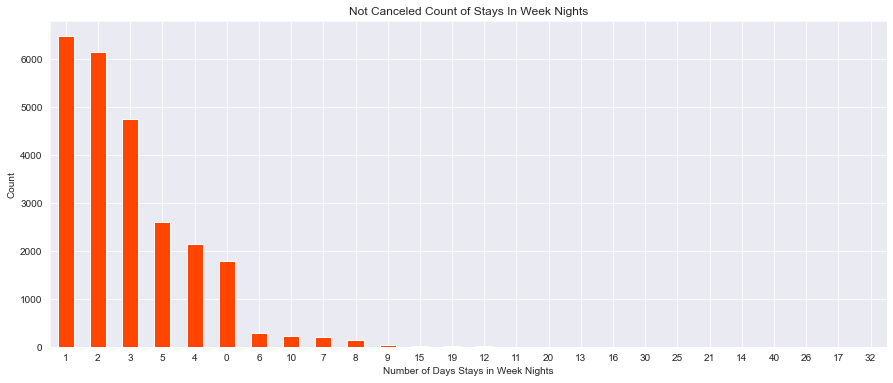

In [16]:
df_notcanceled=df[df.is_canceled==0] #filter dataset for only bookings not canceled
df_canceled=df[df.is_canceled==0] #filter dataset for only bookings canceled


df_notcanceled['stays_in_week_nights'].value_counts().plot(kind='bar',figsize=(15,6), color ='#FF4500')

# Aesthetics
plt.title("Not Canceled Count of Stays In Week Nights")
plt.xlabel("Number of Days Stays in Week Nights")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Canceled Count of Stays In Week Nights

For weekday nights, 1, 2 weekday stays had the highest number of cancellations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '4'),
  Text(5, 0, '0'),
  Text(6, 0, '6'),
  Text(7, 0, '10'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '9'),
  Text(11, 0, '15'),
  Text(12, 0, '19'),
  Text(13, 0, '12'),
  Text(14, 0, '11'),
  Text(15, 0, '20'),
  Text(16, 0, '13'),
  Text(17, 0, '16'),
  Text(18, 0, '30'),
  Text(19, 0, '25'),
  Text(20, 0, '21'),
  Text(21, 0, '14'),
  Text(22, 0, '40'),
  Text(23, 0, '26'),
  Text(24, 0, '17'),
  Text(25, 0, '32')])

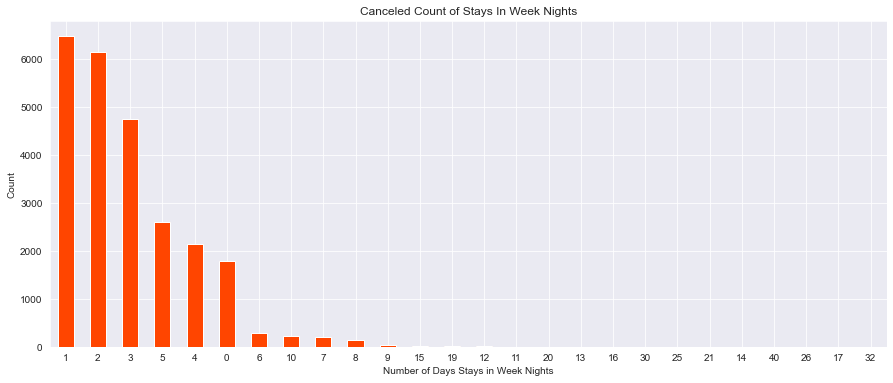

In [17]:
df_canceled['stays_in_week_nights'].value_counts().plot(kind='bar',figsize=(15,6),color ='#FF4500')

# Aesthetics
plt.title("Canceled Count of Stays In Week Nights")
plt.xlabel("Number of Days Stays in Week Nights")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Not Canceled Count of Stays In Weekend Nights

For not canceled bookings, 0 nights stayed in weekend nights had the highest count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '1'),
  Text(3, 0, '4'),
  Text(4, 0, '3'),
  Text(5, 0, '6'),
  Text(6, 0, '8'),
  Text(7, 0, '5'),
  Text(8, 0, '12'),
  Text(9, 0, '10'),
  Text(10, 0, '13'),
  Text(11, 0, '9'),
  Text(12, 0, '16')])

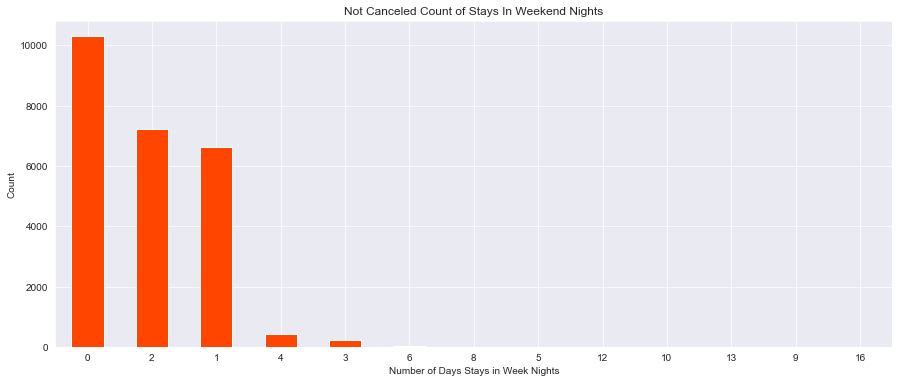

In [18]:
df_notcanceled['stays_in_weekend_nights'].value_counts().plot(kind='bar',figsize=(15,6), color ='#FF4500')

# Aesthetics
plt.title("Not Canceled Count of Stays In Weekend Nights")
plt.xlabel("Number of Days Stays in Week Nights")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Canceled Count of Stays In Weekend Nights

For canceled bookings, 0 weekend nights had the highest count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '1'),
  Text(3, 0, '4'),
  Text(4, 0, '3'),
  Text(5, 0, '6'),
  Text(6, 0, '8'),
  Text(7, 0, '5'),
  Text(8, 0, '12'),
  Text(9, 0, '10'),
  Text(10, 0, '13'),
  Text(11, 0, '9'),
  Text(12, 0, '16')])

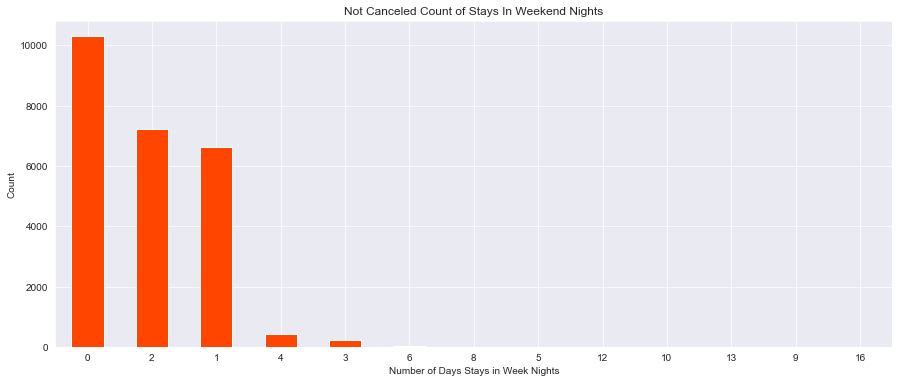

In [19]:

df_canceled['stays_in_weekend_nights'].value_counts().plot(kind='bar',figsize=(15,6), color ='#FF4500')

# Aesthetics
plt.title("Not Canceled Count of Stays In Weekend Nights")
plt.xlabel("Number of Days Stays in Week Nights")
plt.ylabel("Count")
plt.xticks(rotation=0)


# Insight Drawn:

Cancellations was the highest over weekdays (amongst only 1-2 days) which indicates short term travelers whom have their bookings during the week are more likely to cancel their bookings rather than weekend stays. Further analysis is needed to confirm this insight

# Cancellations By Hotel Type

City Hotels had the highest number of cancellations compared to Resort Hotels in 2017

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

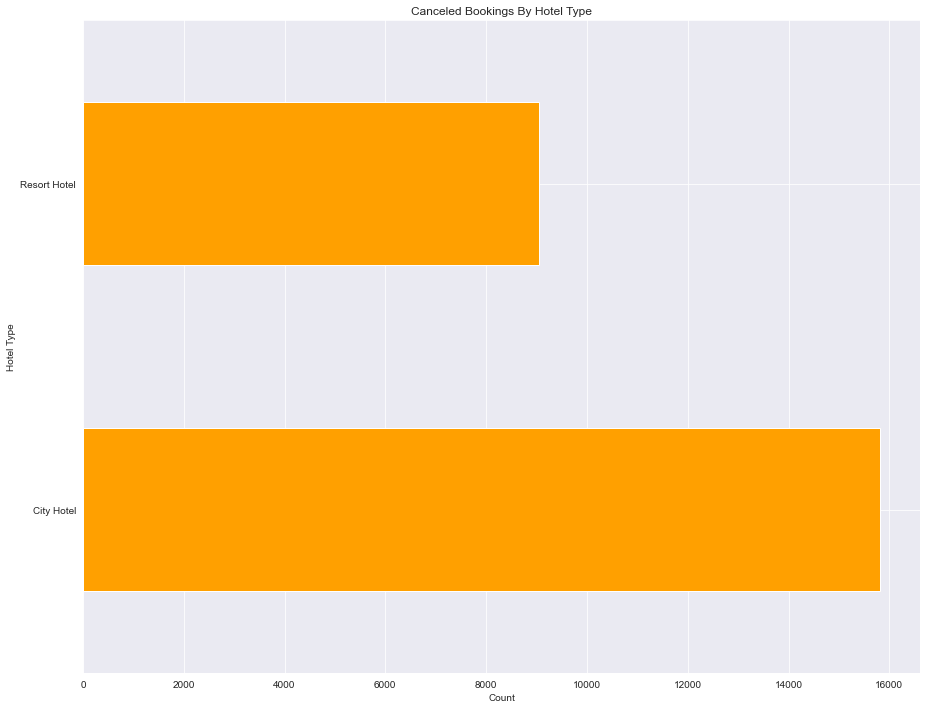

In [20]:

df_canceled['hotel'].value_counts().plot(kind='barh',figsize=(15,12), color ='#FFA000')

# Aesthetics
plt.title("Canceled Bookings By Hotel Type")
plt.xlabel("Count")
plt.ylabel("Hotel Type")
plt.xticks(rotation=0)


# Booking Customer Type for Cancelations

Transient booking types had the highest number of cancellations in 2017. 

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

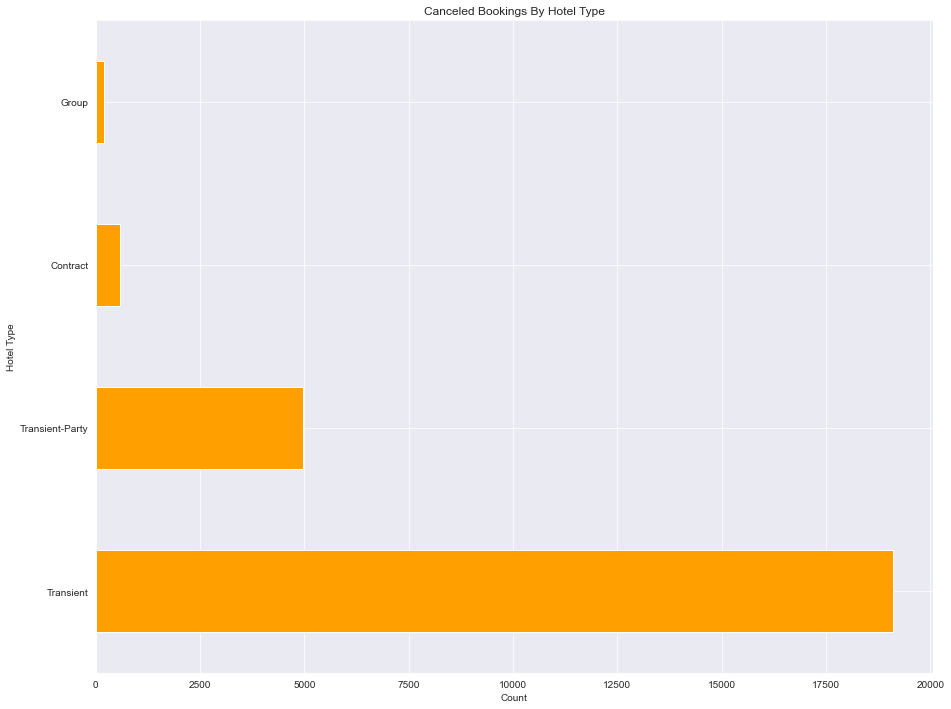

In [21]:
df_canceled['customer_type'].value_counts().plot(kind='barh',figsize=(15,12), color ='#FFA000')

# Aesthetics
plt.title("Canceled Bookings By Hotel Type")
plt.xlabel("Count")
plt.ylabel("Hotel Type")
plt.xticks(rotation=0)


# Which Month had the highest number of cancellations?

Overall, May had the highest number bookings cancelled followed by April and June

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

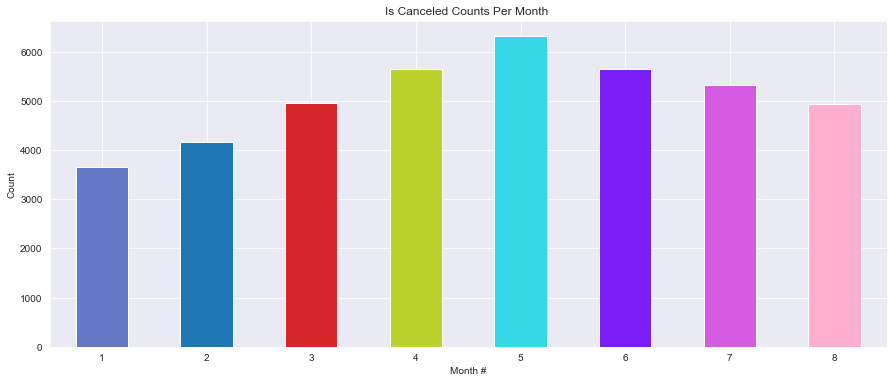

In [22]:
df['month']= df['date'].dt.month

colors = ['#6578C6', '#1f77b4', '#d62728', '#BCD32F', '#34D8E7',
          '#791EF4', '#D55BE0', '#FFAFCE', '#FFC500', '#FF4700', '#076874', '#A4A8AE']
sns.set_style('darkgrid')

df.groupby('month').is_canceled.count().plot(kind = 'bar',figsize=(15,6), color=colors)
 

# Aesthetics
plt.title("Is Canceled Counts Per Month ")
plt.xlabel("Month #")
plt.ylabel("Count")
plt.xticks(rotation=0)


In [23]:
#do an analysis per day
#market_segment	distribution_channel

# Canceled Bookings By Market Segment


We can see that online travel agents had the highest cancellations amongst all other market segments. Although we learned earlier that shot term travelers who had their bookings on weekdays cancelled their bookings at higher counts, corporates were 5th on the list.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

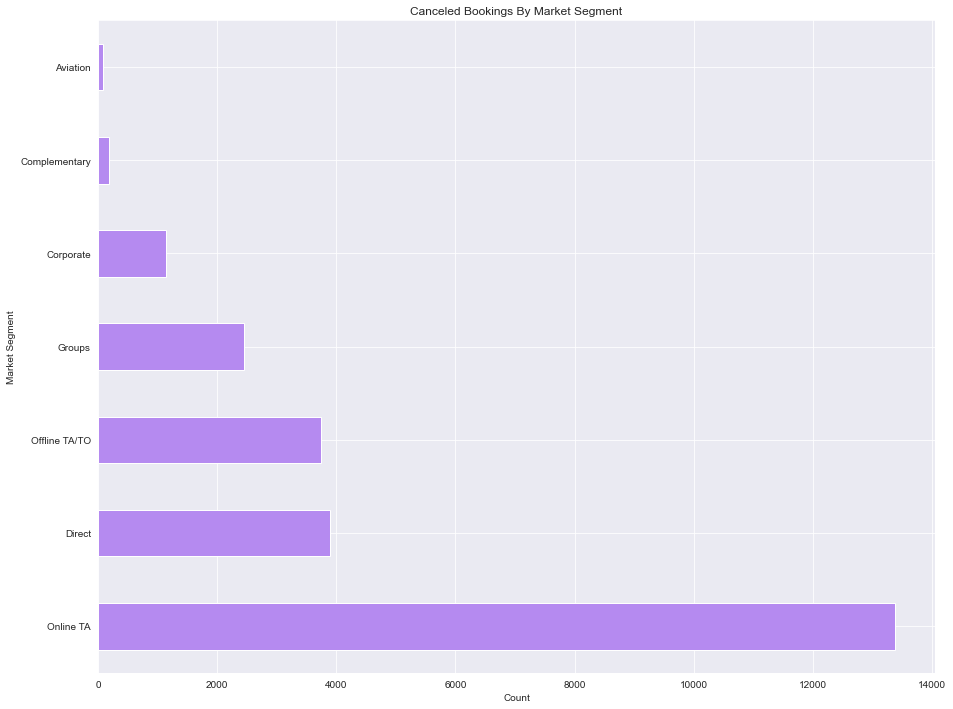

In [24]:
df_canceled['market_segment'].value_counts().plot(kind='barh',figsize=(15,12), color ='#B58AF0')

# Aesthetics
plt.title("Canceled Bookings By Market Segment")
plt.xlabel("Count")
plt.ylabel("Market Segment")
plt.xticks(rotation=0)